#  CE-40959: Deep Learning

## Homework1: Numpy and Tensorflow  (70pts)
 

### Deadline:   2  Esfand

You can run cells by hitting `Shift` + `Enter`. <br/>
We higly recommend you to read each line of code meticulously and try to unserstand what it exactly does. You may want to use the techniques mentioned in this notebook in your next assignments.<br/>
You may want to read the two tutorials `Numpy Tutorial` and `TensorFlow Tutorial` first before coming to this notebook.

In [434]:
# importing modules
import numpy as np
import tensorflow as tf
import os
from perceptron import Perceptron
import time
import matplotlib.pyplot as plt
import math
from sklearn.metrics import pairwise_distances

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0) # set default size of plots

# The following two lines let us reload external modules in the notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Problem 1. $L^2$ Distance (12pts)
Suppose that we have a matrix called $X1$ which is a numpy ndarray with shape $(N1, D)$. This matrix has $N$ rows and each row corresponds to a $D-$dimensional vector which we call an instance. There is also another matrix named $X2$ with the shape $(N2, D)$. Note that $N1$ is not essentially equal to $N2$. <br/>
We want to compute the $L^2$-distance between each instance in the first matrix and each instance in the second matrix. $L^2$-distance or _Euclidean distance_ between two vectors $\mathbf{p}$ and $\mathbf{q}$ is defined as follows:

\begin{equation}
d(\mathbf{p}, \mathbf{q}) = \sqrt{(p_1 - q_1)^2 + ... +\:(p_m - q_m)^2}
\end{equation}

We want to make a matrix called `dists` in which the $(i, j)$-th entry is the $L^2$-distance between the $i$-th instance in $X1$ and the $j$-th instance in $X2$. <br/>
Complete the code of following functions to do this task.

In [437]:
def L2_distance_1(x1, x2):
    """
    x1: numpy 2d-array with shape (N1, D)
    x2: numpy 2d-array with shape (N2, D)
    ouput: dists which is a 2d-array with shape (N1, N2)
    """
    dists = []
    n1 = x1.shape[0]
    n2 = x2.shape[0]
    dists = np.zeros((n1,n2))
    for i in range(n1):
        for j in range(n2):
            dists[i][j] = math.sqrt(sum((x1[i] - x2[j]) ** 2))
    return dists
    

def L2_distance_2(x1, x2):
    dists = None
    dists = -2 * x1 @ x2.T 
    dists += np.sum(np.power(x1, 2), axis=1)[:,None]
    dists += np.sum(np.power(x2, 2), axis=1)[:,None].T
    dists = np.sqrt(dists)
    return dists

Now let's test your implementation of `L2_distance_1` with the following function. You have to witness a small value as the ouput. we get an ouput of the order of 1e-15.

In [438]:
np.random.seed(42)
def test_L2_distance_1():
    x1 = np.random.randn(10, 8)
    x2 = np.random.randn(8, 8)
    
    out_correct = pairwise_distances(x1, x2)
    out = L2_distance_1(x1, x2)
    
    print(np.linalg.norm(out - out_correct))  # prints the L2-norm of the difference between your answer and correct answer

test_L2_distance_1()  

3.003763739621564e-15


Now let's test your implementation of `L2_distance_2`. You should get a small value as the output. Ours is of the order of 1e-14.

In [439]:
np.random.seed(42)
def test_L2_distance_2():
    x1 = np.random.randn(30, 25)
    x2 = np.random.randn(40, 25)
    
    out_correct = pairwise_distances(x1, x2)
    out = L2_distance_2(x1, x2)
    
    print(np.linalg.norm(out - out_correct))
test_L2_distance_2()

1.6304788408914756e-14


Finally, let's compare the running time of functions! We have provided the following code snippet to do it.

In [ ]:
a = np.random.randn(1000, 1000)
b = np.random.randn(2000, 1000)

tic = time.time()
L2_distance_1(a, b)
toc = time.time()
print('Running time of L2_distance_1:', toc - tic, 'seconds')

tic = time.time()
L2_distance_2(a, b)
toc = time.time()
print('Running time of L2_distance_2:', toc - tic, 'seconds')

You should see a huge improvement in runnnig time of `L2_distance_2` comparing to `L2_distance_1`. This experiment shows that how vectorized and matrix computations in Numpy could be more effiecient than just naively using for loops in Python. Numpy is a powerful module with a beautiful functional API and many of its functions are implemented in C which results in a great efficiency. Nevertheless, one of the biggest disadvantages of Numpy is that it cannot run on GPU. By using machine learning frameworks such as TensorFlow, PyTorch, Keras, and ... we will sidestep this problem.

## Problem 2. Computing gradients (12pts)

In this problem you have to compute the gradient of $out$ which is computed in function `gradients` with respect to $x$, $y$, $z$, $w$, $t$, $l$ (i.e. $\large{\frac{\partial{out}}{\partial{x}}}$, $\large{\frac{\partial{out}}{\partial{y}}}$, $\large{\frac{\partial{out}}{\partial{z}}}$, $\large{\frac{\partial{out}}{\partial{w}}}$, $\large{\frac{\partial{out}}{\partial{t}}}$, $\large{\frac{\partial{out}}{\partial{l}}}$) using the chain rule and save them in $grad\_x$, $grad\_y$, $grad\_z$, $grad\_w$, $grad\_t$, $grad\_l$ and return them.

Here is the computations done by `gradients` in a mathematical formation:
\begin{equation}
z = matmul(x, y) \\
w = z^2 \\
t = \frac{1}{w} \\
l = -log(t) \\
out = \text{sum  of  elements  of}\;l\\
\end{equation} 

In [123]:
def gradients(x, y):
    """
    x: a numpy 2d-array with shape (N, M)
    y: a numpy 2-d array with shape (M, K)
    ouput: grad_x, grad_y, grad_z, grad_w, grad_t, grad_l which are numpy ndarrays
    """
    z = np.matmul(x, y)
    w = z ** 2
    t = 1 / w
    l = -np.log(t)
    out = np.sum(l)
    
    
    grad_x, grad_y, grad_z, grad_w, grad_t, grad_l = [None] * 6
    grad_l = np.ones(l.shape)
    grad_t = grad_l * (-1 / t)
    grad_w = grad_t * (-1 / w **2)
    grad_z = grad_w * (2 * z)
    grad_x = grad_z @ y.T
    grad_y = (x.T @ grad_z)
    
    return grad_x, grad_y, grad_z, grad_w, grad_t, grad_l


Let's check if you have correctly computed gradients. You have to get small values as the ouput. The largest order of ours is 1e-8.

In [124]:
def test_gradients():
    np.random.seed(42)
    x = np.random.randn(3, 4)
    y = np.random.randn(4, 3)
    grad_x, grad_y, grad_z, grad_w, grad_t, grad_l = gradients(x, y)
    
    correct_grad_x = [[  3.32621571,   2.48439068,   2.83312268,   1.8754347 ],
                      [  0.02298492,   2.49547912,   4.96601427,  -1.63235705],
                      [ -3.00303062, -11.9160904,  -16.79683266,  -7.02424337]]
    
    correct_grad_y = [[ -9.80041543,  -1.26504757,  -1.74360921],
                      [ 10.79761188,   1.60070006,   0.95345402],
                      [-12.46579728,  -3.86728553,   0.46416181],
                      [-13.8342653,   -3.86406485,  -1.41252948]]
    
    correct_grad_z = [[-2.72460835, -1.23289327, -0.94300016],
                      [-1.30528211, -1.33925965,  1.28908465],
                      [18.64361586,  2.05814041,  2.07330623]]
    
    correct_grad_w = [[ 1.85587266,  0.38000645,  0.22231233],
                      [ 0.42594034,  0.4484041,   0.41543481],
                      [86.89610309,  1.05898549, 1.07464968]]
   
    correct_grad_t = [[-0.53883007, -2.63153426, -4.49817611],
                      [-2.34774662, -2.23013124, -2.40711656],
                      [-0.011508,   -0.94430001, -0.9305358 ]]
    
    correct_grad_l = [[1., 1., 1.],
                      [1., 1., 1.],
                      [1., 1., 1.]]
    
    
    print('relative error of grad_x:', np.linalg.norm(grad_x - correct_grad_x))
    print('relative error of grad_y:', np.linalg.norm(grad_y - correct_grad_y))
    print('relative error of grad_z:', np.linalg.norm(grad_z - correct_grad_z))
    print('relative error of grad_w:', np.linalg.norm(grad_w - correct_grad_w))
    print('relative error of grad_t:', np.linalg.norm(grad_t - correct_grad_t))
    print('relative error of grad_l:', np.linalg.norm(grad_l - correct_grad_l))
    

test_gradients()    

relative error of grad_x: 1.1210703601008806e-08
relative error of grad_y: 1.2348441030403075e-08
relative error of grad_z: 9.790876213014406e-09
relative error of grad_w: 1.1399885921130272e-08
relative error of grad_t: 1.0015797364161718e-08
relative error of grad_l: 0.0


## Problem 3. Jacobian (10pts)
We have provided a function called `func` for you below. You have to find out the operations done by this function and then complete the code of `jacobian_func` to compute the jacobian of the output of `func` (i.e. x_4). Note that the Jacobian of a function $\mathbf{f}$: $\mathbb{R}^n \rightarrow \mathbb{R}^m$ is an $m \times n$ matrix defined as follows:

<img src="image/jacobian.png" style="width: 400px;"/>

In [159]:
def func(x):
    """
    the input vector x is a numpy 1d-array. 
    """
    ones = np.ones_like(x)
    x_1 = x - ones
    x_2 = x_1.copy()
    for i in range(len(x_1)-1):
        x_2[i] = x_1[i] * x_1[i+1]

    x_3 = x_2[:-1]
    x_4 = x_3 ** 2
    
    return x_4

In [170]:
def jacobian_func(x):
    """
    x is the same input passed to func on which the computations are done.
    you have to return the jacobian of the output of func.
    """
    res = np.zeros((x.shape[0] - 1, x.shape[0]))
    diag1 = 2 * func(x) / (x[:-1] - 1)
    diag2 = 2 * func(x) / (x[1:] - 1)
    for i in range(res.shape[0]):
        res[i][i] = diag1[i]
        res[i][i + 1] = diag2[i]
    return res

Let's check your implementation of `jacobian_func`. You have to get a small value as the ouput. We get 1e-8.

In [171]:
def test_jacobian_func():
    np.random.seed(42)
    a = np.random.randn(7)
    jacobian = jacobian_func(a)
    correct_jacobian = [[-1.30416021, -0.57663705, 0., 0., 0., 0., 0.],
                        [ 0., -0.28257039, -0.9129416, 0., 0., 0., 0.],
                        [ 0., 0., -0.19275681, 0.12984045, 0., 0., 0.],
                        [ 0., 0., 0., 1.59328969, -0.67523056, 0., 0.],
                        [ 0., 0., 0., 0., -3.75946327, -3.75951328, 0.],
                        [ 0., 0., 0., 0., 0., -0.82807501, 1.76439116]]
    print(np.linalg.norm(jacobian - correct_jacobian))
test_jacobian_func()

1.0346260345190772e-08


## Problem 4. Data manipulation (12pts)

### 4.1. Load Data

In this problem you should load MNIST dataset in the format of numpy arrays.<br/> 
MNIST is a large database of handwritten digits that is commonly used in the field of machine learning. This dataset contains 60,000 training images and 10,000 testing images. We have provided this dataset saved in some files in the `data` directory for you. Training data has been saved in 5 files (`train1.npy`, ..., `train5.npy`) and test data file is `test.npy`. Labels are also stored in two files `labels_train`, `labels_test`.

In [174]:
def load_data(root_path):
    """
    root_path: the root directory of data files.
    outputs:
    1) test_data: test data which is a numpy array of shape (10000, 784).
    2) train_data_array: a Python list containing 5 numpy 2d-arrays each one of them has the shape (12000, 784).
    3) test_labels: a numpy array with shape (10000, ) containing the labels (0 to 9) of the test set images.
    4) train_labels: a numpy array with shape (60000, ) containing the labels (0 to 9) of the training set images.
    """
    train_data_file_names = ['train{}.npy'.format(x) for x in range(1, 6)]
    test_data_file_name = 'test.npy'
    test_labels_file_name = 'labels_test.npy'
    train_labels_file_name = 'labels_train.npy'
    
    train_data_list = []
    for file_name in train_data_file_names:
        file_path = os.path.join(root_path, file_name)
        train_data_list.append(np.load(file_path))

    test_data = np.load(os.path.join(root_path, test_data_file_name))
    test_labels = np.load(os.path.join(root_path, test_labels_file_name))
    train_labels = np.load(os.path.join(root_path, train_labels_file_name))
    
    return test_data, train_data_list, test_labels, train_labels


Now let's test your implementation of `load_data` with the following function. You have to get no erros after running this function:

In [175]:
def test_load_data(root_path):
    test_data, train_data_list, test_labels, train_labels = load_data('data')
    assert test_data.shape == (10000, 784)
    assert len(train_data_list) == 5
    assert test_labels.shape == (10000, )
    assert train_labels.shape == (60000, )
    assert train_data_list[0].shape == (12000, 784)
    print('You have successfully loaded the data!')
    
test_load_data('data')

You have successfully loaded the data!


Each one of the samples of MNIST dataset is a $28\times28$ graysacle image. Pixel values are between 0 and 255.

<img src="image/mnist.jpg" >

### 4.2. Concatenation
You have loaded the training data as a list of five numpy arrays, each one of them has the shape $(12000, 784)$. We need to concatenate these five arrays into one array with shape $(60000, 784)$. <br/> 
In this part you should Implement a function for cancatenating a set of numpy nd-arrays given to you in a Python list (Note that the list does not necessarily contain five arrays and the arrays might not be 2d-arrays! You have to implement the function for general case). You have to do the concatenation along the first dimension i.e. axis=0. You are **not** allowed to use `np.concatenate` in your code and you have to do it from scratch using Numpy.

In [185]:
def concat(list_of_arrays):
    """
    list_of_arrays is a non-empty list of numpy arrays (with arbitrary number of dimensions) with the SAME shape
    output: array_concat which is a numpy ndarray
    """
    array_concat = None
    for piece in list_of_arrays:
        if array_concat is None:
            array_concat = piece
        else:
            array_concat = np.append(array_concat, piece, axis=0)
    return array_concat


Now let's test your implementation with the following function. You have to get no errors.

In [186]:
def test_concat():
    t1 = [np.random.randn(10) for _ in range(10)]
    t2 = [np.random.randn(5, 3) for _ in range(5)]
    t3 = [np.random.randn(1, 5, 3, 4) for _ in range(3)]
    t3 = [np.random.randn(100, 5, 2, 5, 14) for _ in range(3)]
    t1_concat, t2_concat, t3_concat = concat(t1), concat(t2), concat(t3)
    assert np.array_equal(t1_concat, np.concatenate(t1, axis=0))
    assert np.array_equal(t2_concat, np.concatenate(t2, axis=0))
    assert np.array_equal(t3_concat, np.concatenate(t3, axis=0))
    print('you have successfully implemented concatenation!')

test_concat()

you have successfully implemented concatenation!


Now let's concat `train_data_list` with your `concat` function and save it in `train_data`:

In [187]:
test_data, train_data_list, test_labels, train_labels = load_data('data')
train_data = concat(train_data_list)
assert train_data.shape == (60000, 784)

Next step is visualizing some of the digits we have loaded. But, first we have to reshape each sample into a 2d-array.

### 4.3. Reshape
Complete the function `reshape` to reshape a flat array with shape $(N, d^2)$ to an array with shape $(N, d, d)$. You can use `np.reshape` in your implementation.

In [206]:
def reshape(x):
    """
    x is an array with shape (N, d*d)
    output: x_reshaped which is numpy 3d-array with shape (N, d, d)
    """
    x_reshaped = None
    N = x.shape[0]
    d = int(math.sqrt(x.shape[1]))
    x_reshaped = x.reshape((N, d, d))
    return x_reshaped


Now let's test you implementation of `reshape` with the following function.

In [207]:
def test_reshape():
    a = np.empty([531, 100])
    b = np.empty([3000, 4096])
    c = np.empty([10000, 10000])
    a_reshaped, b_reshaped, c_reshaped = reshape(a), reshape(b), reshape(c) 
    assert a_reshaped.shape == (531, 10, 10)
    assert b_reshaped.shape == (3000, 64, 64)
    assert c_reshaped.shape == (10000, 100, 100)
    print('you have successfully implemented reshape!')
    
test_reshape()

you have successfully implemented reshape!


### 4.4. Visualization
Let's apply your reshape function on some of the digit samples in the dataset and visualize them:

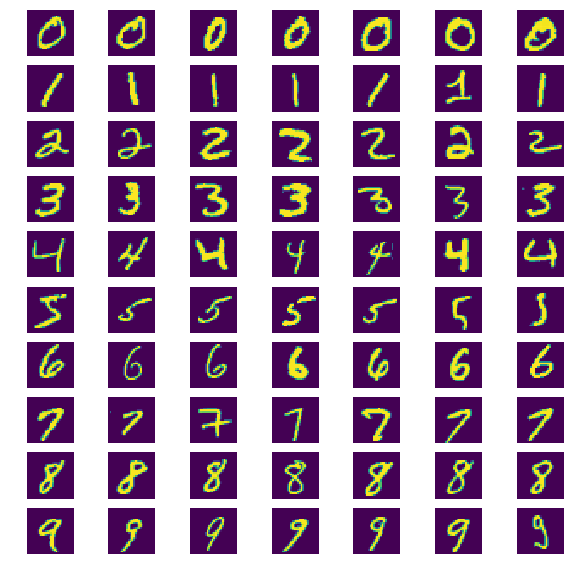

In [208]:
samples_per_class = 7

for i in range(10):
    idxs = np.where(train_labels==i)[0]
    idxs = idxs[:samples_per_class]
    sample_imgs = reshape(train_data[idxs])
    
    for j, idx in enumerate(idxs):
        plt_idx = i * samples_per_class + j + 1
        plt.subplot(10, samples_per_class, plt_idx)
        plt.imshow(sample_imgs[j])
        plt.axis('off')

### 4.5. Split
During this course, you will see that we mostly partition our training data into train and validation set. Implement the following function to split the given data into two sets provided the ratio between the size of validation set and the whole training dataset. You **cannot** use `np.array_split()` or `np.split()` in the first function.

In [259]:
def split_train_1(x, val_ratio=0.1):
    """
    x: a numpy ndarray
    val_ratio: ratio between the size of validation set and x
    ouputs: x_train, x_val: numpy ndarrays
    """
    x_train, x_val = None, None
    
    N = int(x.shape[0] * val_ratio)
    x_train = x[N:, ...]
    x_val = x[:N, ...]
    
    return x_train, x_val

def split_train_2(x, val_ratio=0.1):
    """
    x: a numpy ndarray
    ratio: ratio between the size of validation set and size of input x
    ouputs: x_train, x_val: numpy ndarrays
    """
    N = int(x.shape[0] * (1 - val_ratio))
    res = np.split(x, [N, x.shape[0]], axis=0)
    x_train = res[0]
    x_val = res[1]

    return x_train, x_val


### 4.6. Shuffle

Shuffling data serves the purpose of reducing variance and making sure that models remain general and overfit less. You will want to shuffle the data to make sure that the training/test/validation sets are representative of the overall distribution of the data.<br/>
Consider the function `shuffle` which takes two parameters: 
1. $x$ which is a numpy nd-array with shape $(N, d1, d2, ...)$ 
2. $y$ which is a numpy 1d-array with shape $(N, )$.

You have to complete this function so that it shuffles x and y with the **same** order.

In [315]:
def shuffle(x, y):
    """
    x: a numpy nd-array with shape (N, d1, d2, ...)
    y: a numpy 1d-array with shape (N, )
    output: x_shuffled and y_shuffled
    """
    x_shuffled, y_shuffled = None, None
    
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    y_shuffled = y[indices]
    x_shuffled = x[indices]
    
    return x_shuffled, y_shuffled


Make sure that your implementation is correct with the following simple test:

In [318]:
def test_shuffle():
    x = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
    y = np.array([1, 2, 3])
    x_shuffled, y_shuffled = shuffle(x, y)
    print(x_shuffled)
    print(y_shuffled)

test_shuffle()

[[3 3 3]
 [1 1 1]
 [2 2 2]]
[3 1 2]


## Problem 5. Perceptron (12pts)

In machine learning, the perceptron is an algorithm for supervised learning of binary classifiers. A binary classifier is a function which can decide whether or not an input, represented by a vector of numbers, belongs to some specific class. It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector.

<img src ="image/percep.png" >

Like most other techniques for training linear classifiers, the perceptron generalizes naturally to multiclass. Each training instance is a feature vector $\normalsize x$ and a class label $\normalsize y^*$. Each class has a weight vector $\normalsize w_{y}$. The feature vector is multiplied by the weight vectors and score of class $\normalsize y$ will be $\normalsize x.w_{y}$. The resulting scores is used to choose the predicted class:
\begin{equation}
\normalsize
\hat{y} = \underset{y}{\operatorname{argmax}} x.w_{y}
\end{equation}

For learning, perceptron starts with all weights equal to zero and iterates over the examples one by one, predicting an output for each. It leaves the weights unchanged when the predicted output matches the target. If the prediction is wrong, it lowers the score of wrong answer and raise the score of right answer. Therefore, the updates become:
\begin{equation}
\normalsize
w_{\hat{y}} = w_{\hat{y}} - x \\
\normalsize
w_{y^*} = w_{y^*} + x
\end{equation}
where $\hat{y}$ is the predicted wrong class and $y^*$ is the right class.

Open `perceptron.py` and complete the code of the perceptron model in it.

In [342]:
from perceptron import Perceptron
model = Perceptron(784, 10)

Let's use the functions of the previous problem to preprocess the data and make 4 sets `X_train`, `X_val`, `y_train`, `y_val`.

In [325]:
np.random.seed(42)

test_data, train_data_list, test_labels, train_labels = load_data('data')
train_data = concat(train_data_list)

print(train_data.shape)  # Expected ouput: (60000, 784)
print(test_data.shape)  # Expected ouput: (10000, 784)
print(test_labels.shape)  # Expected ouput: (10000,)
print(train_labels.shape)  # Expected ouput: (60000,)

train_data_shuffled, train_labels_shuffled = shuffle(train_data, train_labels)
X_test, y_test = test_data, test_labels
X_train, X_val = split_train_1(train_data, val_ratio=1/60)
print(X_train.shape, X_val.shape)  # Expected ouput: (59000, 784) (1000, 784)
y_train, y_val = split_train_1(train_labels, val_ratio=1/60)
print(y_train.shape, y_val.shape)  # Expected ouput: (59000,) (1000,)

(60000, 784)
(10000, 784)
(10000,)
(60000,)
(59000, 784) (1000, 784)
(59000,) (1000,)


In [329]:
# adding 1s to the end of feature vectors to be multiplied by bias term of weights
# WARNING: RUN THIS CELL ONLY ONCE!
X_val = np.insert(X_val, 0, 1, axis=1)
X_train = np.insert(X_train, 0, 1, axis=1)
X_test = np.insert(X_test, 0, 1, axis=1)
print(X_train.shape)  # Expected ouput: (59000, 785)
print(X_val.shape)  # Expected ouput: (1000, 785)
print(X_test.shape)  # Expected ouput: (10000, 785)

(59000, 785)
(1000, 785)
(10000, 785)


Now let's train your model on the training set. Meanwhile, the accuracy on the validation set is printed out to make sure that the model is training well. Your model has to reach an accuracy higher than 85% on the validation set. We have provided this code for you.

In [343]:
val_accs = []
for i, (x, y) in enumerate(zip(X_train, y_train)):
    model.train(x, y)
    if i % 1000 == 0:
        val_res =  [model.predict(x_val) == y_val for x_val, y_val in zip(X_val, y_val)]
        val_acc = np.sum(val_res) / len(val_res)
        val_accs.append(val_acc*100)  # recording the accuray to be plotted after training 
        print("iteration number %d, accuracy on validation set: %.2f%%" % (i, 100*val_acc))

iteration number 0, accuracy on validation set: 9.70%
iteration number 1000, accuracy on validation set: 72.90%
iteration number 2000, accuracy on validation set: 78.00%
iteration number 3000, accuracy on validation set: 76.90%
iteration number 4000, accuracy on validation set: 81.70%
iteration number 5000, accuracy on validation set: 81.10%
iteration number 6000, accuracy on validation set: 85.20%
iteration number 7000, accuracy on validation set: 79.60%
iteration number 8000, accuracy on validation set: 78.30%
iteration number 9000, accuracy on validation set: 80.80%
iteration number 10000, accuracy on validation set: 86.10%
iteration number 11000, accuracy on validation set: 80.50%
iteration number 12000, accuracy on validation set: 80.20%
iteration number 13000, accuracy on validation set: 81.10%
iteration number 14000, accuracy on validation set: 85.10%
iteration number 15000, accuracy on validation set: 86.50%
iteration number 16000, accuracy on validation set: 83.50%
iteration n

Let's plot the accuracy on validation set:

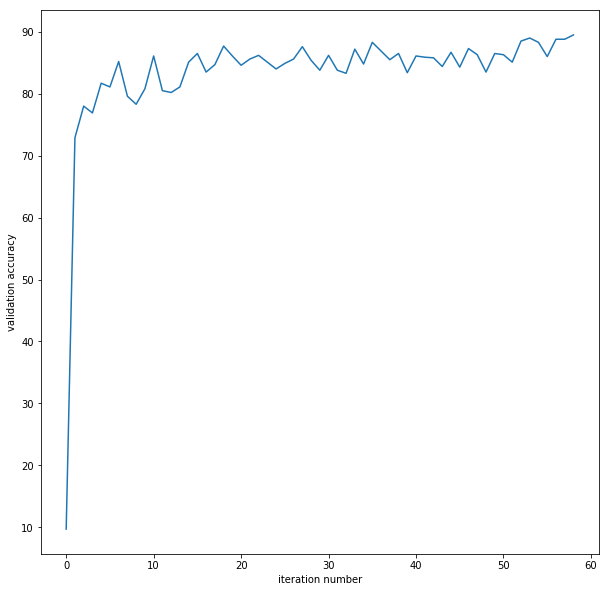

In [344]:
plt.plot(val_accs)
plt.ylabel('validation accuracy')
plt.xlabel('iteration number')
plt.show()

Finally let's test your model on the test set. You have to get an accuracy above 85%.

In [345]:
test_res =  [model.predict(x_test) == y_test for x_test, y_test in zip(X_test, y_test)]
test_acc = np.sum(test_res) / len(test_res)
print("accuracy on test set: %.2f%%" % (100*test_acc))

accuracy on test set: 87.13%


## Problem 6. Implementing a  basic computation in Tensorflow (12pts)

In [346]:
import tensorflow as tf
import numpy as np

Programming with Tensorflow has the following two main steps:

1. Creating a computational model (or more precisely a computational graph). 
3. Creating a session and run your computational model with the session.

In this notebook we just want to familiarize you with how Tensorflow works. In your next assignments you will learn how to design your machine learning models with Tensorflow.

You have to build a computational graph with the following properties:
* $w1, w2, b1, b2$: Variables with shapes $(50, 40)$, $(100, 40)$, $(40,)$, $(40, )$ respectively. Use `tf.get_variable` and initialize them with `tf.random_normal_initializer`.
* $\normalsize x$, $\normalsize y \:$: pacleholders to feed the data to the model with shapes $(200, 50)$, $(150, 100)$ respectively.

Operations:
1. $z = xw_{1} + b_{1}$
2. $a = z^2$
3. $k = yw_{2} + b_{2}$
4. $l = ak^{T}$ 
5. $s$ = Sum of the elements of $l$

Ouputs:  
you have to print the numpy value of $s$.

### 6.1. Building the computational graph

In [361]:
tf.reset_default_graph()
np.random.seed(42)
tf.set_random_seed(42)

w1 = tf.get_variable(name = 'w1', shape = [50,40], initializer = tf.random_normal_initializer)
w2 = tf.get_variable(name = 'w2', shape = [100,40], initializer = tf.random_normal_initializer)
b1 = tf.get_variable(name = 'b1', shape = [40,], initializer = tf.random_normal_initializer)
b2 = tf.get_variable(name = 'b2', shape = [40,], initializer = tf.random_normal_initializer)


### 6.2. Runnning the computational graph

In [418]:
x_input = np.random.randn(200, 50)
y_input = np.random.randn(150, 100)

x = tf.cast(x_input, dtype=tf.float32)
y = tf.cast(y_input, dtype=tf.float32)
z = x @ w1 + b1
a = z ** 2
k = y @ w2 + b2
l = a @ tf.transpose(k)
s = tf.reduce_sum(l)

### 6.3. Computing gradients

Unlike numpy, We can get the gradients of a tensor with respect to other tensors easily in Tensorflow. 

In [428]:
grad_x_np = tf.gradients(s,x)[0]
grad_y_np = tf.gradients(s,y)[0]
grad_a_np = tf.gradients(s,a)[0]
grad_l_np = tf.gradients(s,l)[0]
grad_w1_np = tf.gradients(s,w1)[0]

Let's test if the gradients have the right shape:

In [429]:
assert grad_x_np.shape == (200, 50)
assert grad_y_np.shape == (150, 100)
assert grad_a_np.shape == (200, 40)
assert grad_l_np.shape == (200, 150)
assert grad_w1_np.shape == (50, 40)
assert grad_b2_np.shape == (40,)
print('You have successfully computed gradients!')

You have successfully computed gradients!
